## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

## Load flight data

In [2]:
flight_data_processed = pd.read_csv('../data/processed/processed_flight_data_2022_and_2021.csv')

In [3]:
flight_data_processed

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_WAC,DEST_AIRPORT_ID,DEST,DEST_WAC,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,DISTANCE
0,2022,2,4,1,5,4/1/2022 12:00:00 AM,10397,ATL,34,10721,BOS,13,600,2.0,833,946.0
1,2022,2,4,1,5,4/1/2022 12:00:00 AM,10397,ATL,34,10721,BOS,13,845,6.0,1121,946.0
2,2022,2,4,1,5,4/1/2022 12:00:00 AM,10397,ATL,34,10721,BOS,13,959,2.0,1237,946.0
3,2022,2,4,1,5,4/1/2022 12:00:00 AM,10397,ATL,34,10721,BOS,13,1045,34.0,1323,946.0
4,2022,2,4,1,5,4/1/2022 12:00:00 AM,10397,ATL,34,10721,BOS,13,1135,0.0,1400,946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954777,2021,3,9,30,4,9/30/2021 12:00:00 AM,14771,SFO,91,14747,SEA,93,1630,0.0,1850,679.0
1954778,2021,3,9,30,4,9/30/2021 12:00:00 AM,14771,SFO,91,14747,SEA,93,1800,2.0,2025,679.0
1954779,2021,3,9,30,4,9/30/2021 12:00:00 AM,14771,SFO,91,14747,SEA,93,1910,0.0,2131,679.0
1954780,2021,3,9,30,4,9/30/2021 12:00:00 AM,14771,SFO,91,14747,SEA,93,2004,0.0,2224,679.0


In [4]:
flight_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954782 entries, 0 to 1954781
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   YEAR               int64  
 1   QUARTER            int64  
 2   MONTH              int64  
 3   DAY_OF_MONTH       int64  
 4   DAY_OF_WEEK        int64  
 5   FL_DATE            object 
 6   ORIGIN_AIRPORT_ID  int64  
 7   ORIGIN             object 
 8   ORIGIN_WAC         int64  
 9   DEST_AIRPORT_ID    int64  
 10  DEST               object 
 11  DEST_WAC           int64  
 12  CRS_DEP_TIME       int64  
 13  DEP_DELAY_NEW      float64
 14  CRS_ARR_TIME       int64  
 15  DISTANCE           float64
dtypes: float64(2), int64(11), object(3)
memory usage: 238.6+ MB


In [14]:
weather_data = pd.read_csv('../data/processed/us_airport_weather_2021_2022_date_fixed.csv')

In [15]:
weather_data.head()

,AIRPORT,AIRPORT_DATETIME,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,ATL,2021-01-01 00:00:00,12.8,13.3,0.76,-RA:02 BR:1 |s RA s |RA s,97.0,OVC:08 0.61,982.05,0.4,140,0.0,4.0
1,ATL,2021-01-01 01:00:00,12.8,13.3,0.00,||RA,97.0,NaN,981.71,0.4,140,0.0,4.0
2,ATL,2021-01-01 02:00:00,13.9,14.4,0.25,-DZ:01 BR:1 |s DZ s |DZ s,97.0,OVC:08 0.91,981.38,0.4,110,0.0,4.0
3,ATL,2021-01-01 03:00:00,13.9,14.4,0.25,-RA:02 BR:1 |s RA s |RA s,97.0,OVC:08 0.61,981.04,0.4,120,0.0,4.0
4,ATL,2021-01-01 04:00:00,13.9,15.0,0.07,BR:1 |s |,93.0,NaN,980.70,0.4,120,0.0,5.0


In [16]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288377 entries, 0 to 288376
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AIRPORT                    288377 non-null  object 
 1   AIRPORT_DATETIME           288377 non-null  object 
 2   HourlyDewPointTemperature  288377 non-null  float64
 3   HourlyDryBulbTemperature   288377 non-null  float64
 4   HourlyPrecipitation        288377 non-null  float64
 5   HourlyPresentWeatherType   33995 non-null   object 
 6   HourlyRelativeHumidity     288377 non-null  float64
 7   HourlySkyConditions        285427 non-null  object 
 8   HourlyStationPressure      288377 non-null  float64
 9   HourlyVisibility           288377 non-null  float64
 10  HourlyWindDirection        288377 non-null  int64  
 11  HourlyWindGustSpeed        288377 non-null  float64
 12  HourlyWindSpeed            288377 non-null  float64
dtypes: float64(8), int64(1), obje

## Transformations

### Flight data

In [21]:
flight_data_processed['DEPARTURE_DATETIME'] = pd.to_datetime(flight_data_processed['DEPARTURE_DATETIME'])


### Weather data

In [17]:
# Transform the column "DATE" in weather_data to datetime
weather_data["AIRPORT_DATETIME"] = pd.to_datetime(weather_data["AIRPORT_DATETIME"])

## Merge

In [28]:
# merge data on DEPARTURE_DATETIME and ORIGIN from flight_data_processed and DATE and AIRPORT from weather_data. 
flight_delay_dataset = flight_data_processed.merge(weather_data, left_on=['DEPARTURE_DATETIME', 'ORIGIN'], right_on=['AIRPORT_DATETIME', 'AIRPORT'], how='inner')
flight_delay_dataset

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_WAC,DEST_AIRPORT_ID,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyRelativeHumidity,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,2022,3,8,1,1,2022-08-01,10397,ATL,34,11057,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
1,2022,3,8,1,1,2022-08-01,10397,ATL,34,11697,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
2,2022,3,8,1,1,2022-08-01,10397,ATL,34,12264,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
3,2022,3,8,1,1,2022-08-01,10397,ATL,34,12889,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
4,2022,3,8,1,1,2022-08-01,10397,ATL,34,13204,...,23.3,0.0,NaN,82.0,FEW:02 21.34 FEW:02 45.72 FEW:02 60.96,984.76,16.09,270,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664117,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,21.1,0.0,NaN,44.0,FEW:02 60.96,1013.21,16.09,300,0.0,6.0
1664118,2021,3,9,30,4,2021-09-30,14771,SFO,91,12889,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0
1664119,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0
1664120,2021,3,9,30,4,2021-09-30,14771,SFO,91,12892,...,17.2,0.0,NaN,68.0,CLR:00,1013.55,16.09,290,0.0,4.0


In [23]:
flight_delay_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664122 entries, 0 to 1664121
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   YEAR                       1664122 non-null  int64         
 1   QUARTER                    1664122 non-null  int64         
 2   MONTH                      1664122 non-null  int64         
 3   DAY_OF_MONTH               1664122 non-null  int64         
 4   DAY_OF_WEEK                1664122 non-null  int64         
 5   FL_DATE                    1664122 non-null  object        
 6   ORIGIN_AIRPORT_ID          1664122 non-null  int64         
 7   ORIGIN                     1664122 non-null  object        
 8   ORIGIN_WAC                 1664122 non-null  int64         
 9   DEST_AIRPORT_ID            1664122 non-null  int64         
 10  DEST                       1664122 non-null  object        
 11  DEST_WAC                   1664122 no

In [24]:
%reset_selective -f flight_data weather_data flight_data_processed

<Axes: >

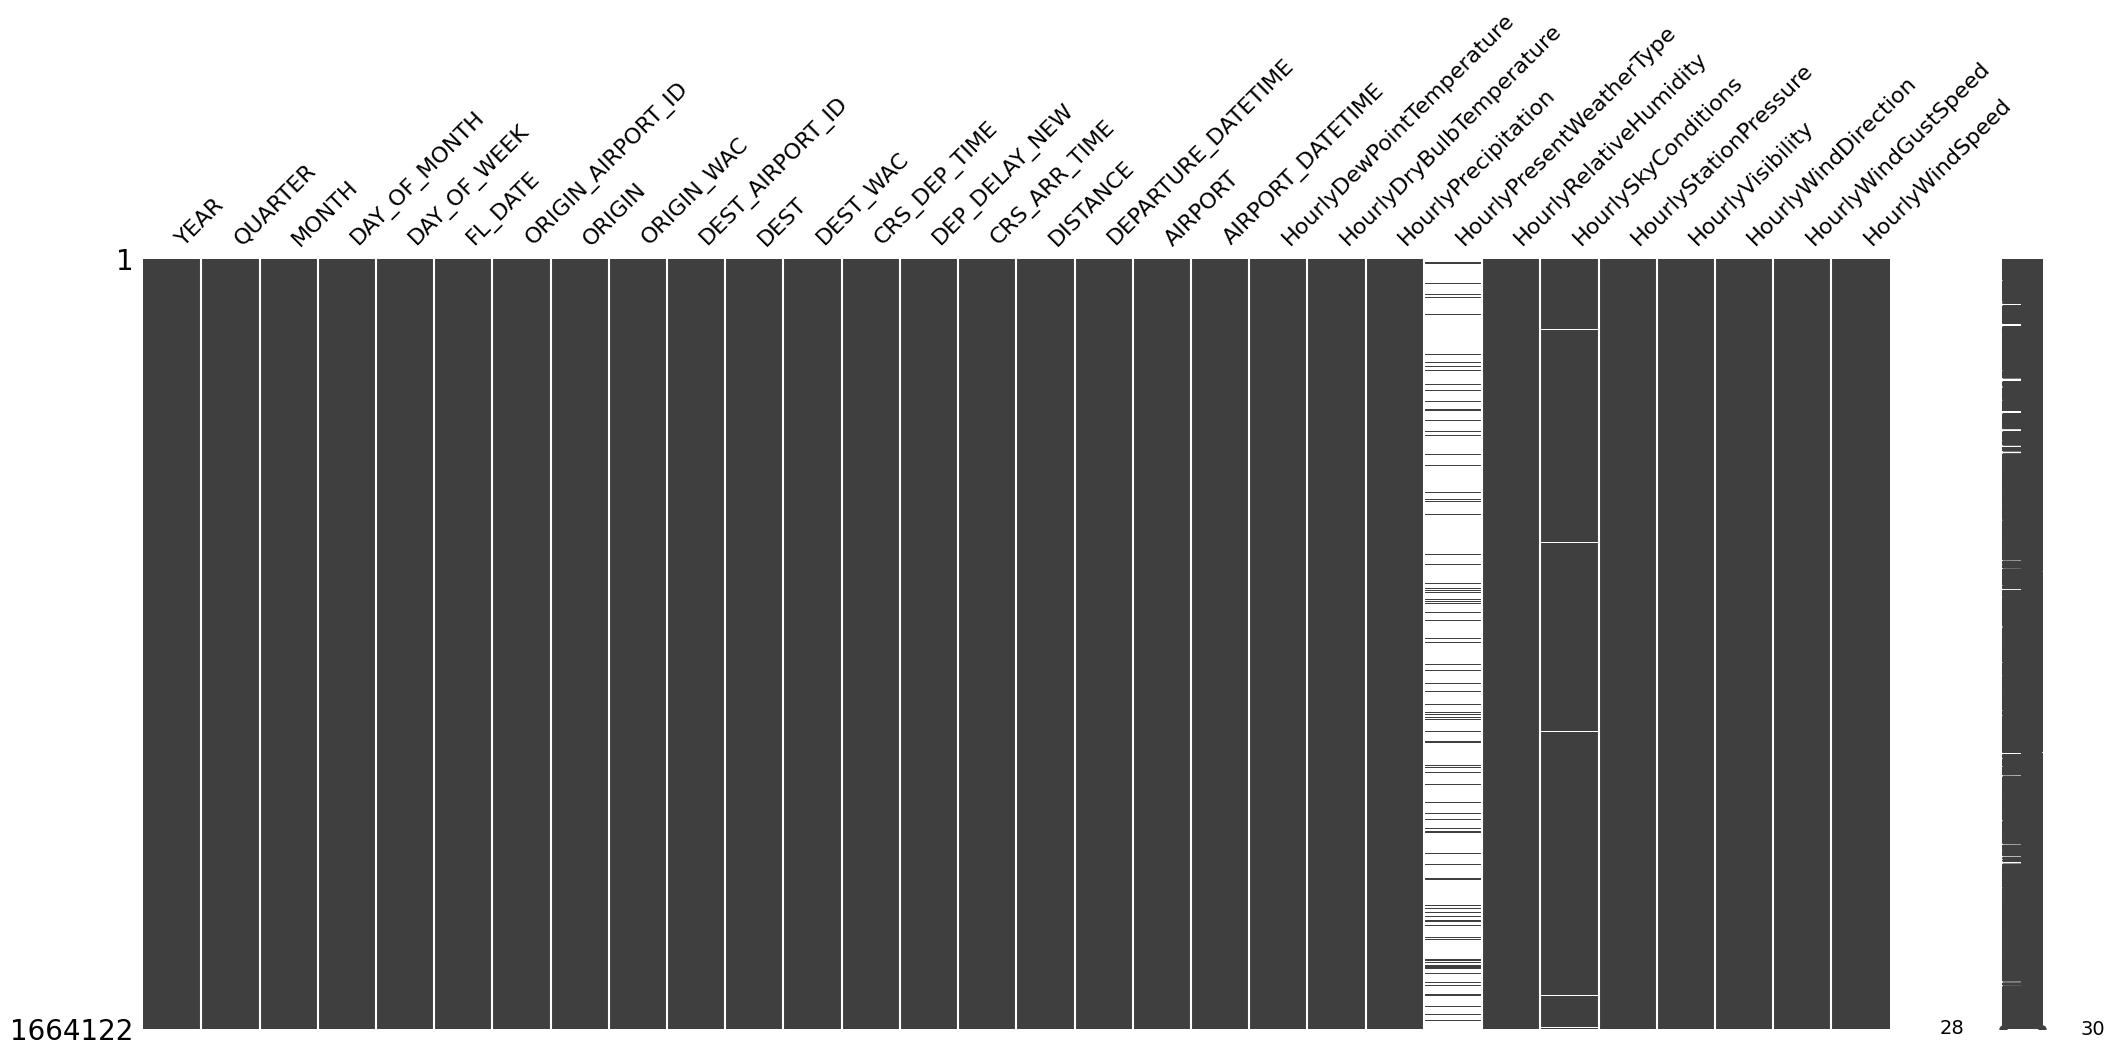

In [25]:
msno.matrix(flight_delay_dataset)

In [27]:
# print the number of missing values in each column
for column in flight_delay_dataset.columns:
    print(f'{column}: {flight_delay_dataset[column].isnull().sum()}')

YEAR: 0
QUARTER: 0
MONTH: 0
DAY_OF_MONTH: 0
DAY_OF_WEEK: 0
FL_DATE: 0
ORIGIN_AIRPORT_ID: 0
ORIGIN: 0
ORIGIN_WAC: 0
DEST_AIRPORT_ID: 0
DEST: 0
DEST_WAC: 0
CRS_DEP_TIME: 0
DEP_DELAY_NEW: 0
CRS_ARR_TIME: 0
DISTANCE: 0
DEPARTURE_DATETIME: 0
AIRPORT: 0
AIRPORT_DATETIME: 0
HourlyDewPointTemperature: 0
HourlyDryBulbTemperature: 0
HourlyPrecipitation: 0
HourlyPresentWeatherType: 1475600
HourlyRelativeHumidity: 0
HourlySkyConditions: 18764
HourlyStationPressure: 0
HourlyVisibility: 0
HourlyWindDirection: 0
HourlyWindGustSpeed: 0
HourlyWindSpeed: 0


## Save

In [29]:
# save the dataset to a csv file
flight_delay_dataset.to_csv('../data/processed/flight_delay_dataset.csv', index=False)